# Hyperparameter *n_estimators* optimieren
## Datensatz "Weinqualität"

Wir laden den Datensatz *weinqualitaet.csv* in den Speicher:

In [17]:
# Datensatz laden
url = "https://raw.githubusercontent.com/troescherw/datasets/master/weinqualitaet.csv"

import pandas as pd
daten = pd.read_csv(url, delimiter=",")
# Löschen von Zeilen mit leeren Einträgen
daten.dropna(inplace=True)

## Optimierung des Hyperparameters *n_estimator*
Wir erstellen mit Hilfe des Trainingsdatensatzes Random Forests mit zunehmender Anzahl Bäume, ermitteln jeweils die Accuracy sowie den OOB-Error und stellen das Ergebnis grafisch dar.
Die Option *oob_score=True* liefert hier Warnungen, sofern die Anzahl der Bäume zu gering ist - also einfach ignorieren ;-)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = daten.iloc[:,:12]
y = daten.iloc[:, -1]
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

ntrees = range(1,100,5)

accuracies = []
oob = []
for ntree in ntrees:
    model = RandomForestClassifier(n_estimators=ntree, oob_score=True, verbose=False)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))
    oob.append(1-model.oob_score_)
    


    

C:\Users\dea40349\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dea40349\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\dea40349\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\dea40349\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\dea40349\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too 

## Grafische Darstellung des Ergebnisses:
Accuracy in Abhängigkeit der Anzahl Bäume:

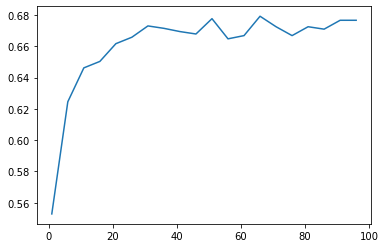

In [19]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ntrees, accuracies)
plt.show()

Wir plotten den OOB-Error in Abhängigkeit der Anzahl der Bäume:

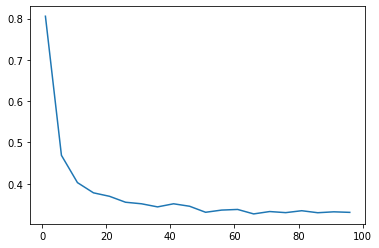

In [20]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.plot(ntrees, oob)
plt.show()